In [68]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [69]:
def read_data():
    with open("data_storage.json", "r", encoding="utf-8") as f:
        data = json.load(f)
        first_sample = data[0]
        name = first_sample["name"]
        path = first_sample["data"]["path"] 
        kalpha1 = first_sample["data"]["kalpha1"] [0]
        kalpha2 = first_sample["data"]["kalpha2"] [0]
        theta_start = first_sample["data"]["theta_start"] [0]
        theta_stop = first_sample["data"]["theta_stop"] [0]
        uvw_xy = first_sample["data"]["uvw_xy"] 
        start_step_end = first_sample["data"]["start_step_end"] 
        counts = json.loads(first_sample["data"]["counts"] )
        counts_bac = json.loads(first_sample["data"]["counts_bac"])
        print(uvw_xy, kalpha1,kalpha2,theta_start,theta_stop,path, counts, start_step_end, counts_bac,name) 
    return uvw_xy, kalpha1,kalpha2,theta_start,theta_stop,path, counts, start_step_end, counts_bac,name


In [ ]:
def plot_sample__bac(counts,counts_bac,name,theta_start,theta_stop):
    start=theta_start
    end=theta_stop
    step = len(counts)
    N = ((end - start)/step)
    print(start,end,N)
    
    x = np.arange(start, end, N)
    plt.figure(figsize=(10, 5))
    plt.plot(x, counts, label="Counts (sample)", color="blue")

    plt.xlabel("2Theta")
    plt.ylabel("Counts")
    plt.title(f"Sample of {name} ")
    plt.grid(True)
    plt.legend()

    plt.plot(x, counts_bac, label="Counts (background)", color="orange")
    plt.xlabel("2θ [deg]")
    plt.ylabel("Intensity")
    plt.grid(True)
    plt.legend()
    plt.show()

[0.004391, -0.000389, 0.009813, 0.422342, 0.085095, 0.0, 0.0, 0.0] 1.540598 1.544426 15.00311127 119.98330298 D:/nai/Nati/studia/inzynierka/github/XRD-AI/Dane/Gr 1/Fe3O4_ref.xrdml [121, 158, 129, 157, 133, 156, 165, 145, 125, 171, 130, 129, 152, 151, 155, 130, 137, 140, 115, 143, 157, 149, 141, 136, 130, 139, 144, 144, 130, 128, 124, 119, 108, 137, 131, 118, 141, 129, 126, 118, 108, 115, 142, 132, 122, 94, 129, 140, 143, 121, 132, 124, 116, 103, 106, 114, 127, 126, 100, 116, 139, 121, 103, 105, 121, 112, 115, 122, 119, 110, 110, 111, 103, 87, 119, 141, 119, 111, 95, 119, 116, 105, 109, 108, 125, 103, 92, 100, 103, 122, 97, 116, 109, 125, 131, 158, 158, 149, 192, 198, 179, 167, 129, 113, 106, 106, 108, 109, 100, 105, 91, 100, 89, 92, 91, 94, 105, 100, 96, 103, 83, 85, 81, 86, 106, 92, 83, 77, 72, 77, 90, 81, 91, 103, 76, 82, 87, 86, 89, 83, 70, 74, 70, 74, 94, 75, 96, 97, 97, 83, 84, 78, 79, 77, 70, 76, 76, 92, 81, 65, 87, 88, 72, 70, 95, 78, 70, 78, 75, 90, 79, 74, 82, 66, 74, 68, 76, 

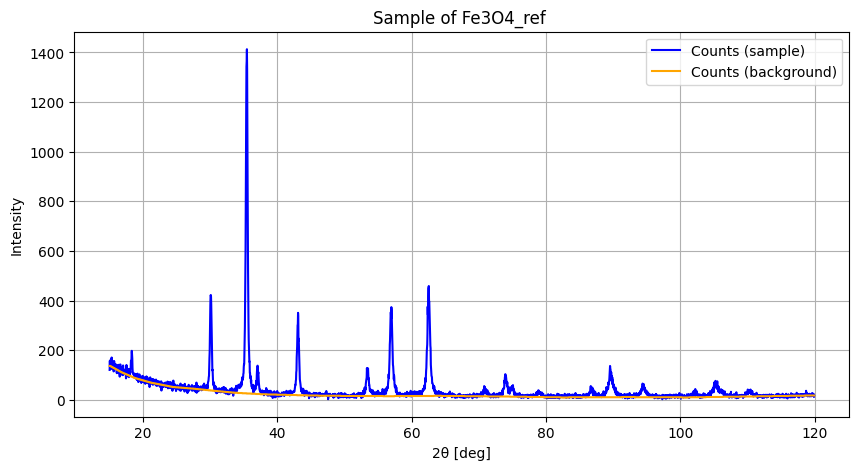

In [ ]:
uvw_xy, kalpha1,kalpha2,theta_start,theta_stop,path, counts, start_step_end, counts_bac,name = read_data()
plot_sample__bac(counts,counts_bac,name,theta_start,theta_stop)

In [72]:
# # To jest lista, więc weź pierwszy element
# entry = data[0]
# # Odczytanie nazwy
# print("Nazwa:", entry["name"])

# # Odczytanie ścieżki
# print("Ścieżka do pliku:", entry["data"]["path"])

# # Odczytanie theta_start
# print("Theta start:", entry["data"]["theta_start"][0])

# # Uwaga: counts i counts_bac to STRING z listą -> trzeba go sparsować
# counts = json.loads(entry["data"]["counts"])
# counts_bac = json.loads(entry["data"]["counts_bac"])

# print("Pierwsze 10 counts:", counts[:10])
# print("Pierwsze 10 counts_bac:", counts_bac[:10])